In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-seris-customer-lifetime-value/squark_automotive_CLV_production_data.csv
/kaggle/input/marketing-seris-customer-lifetime-value/squark_automotive_CLV_training_data.csv


In [2]:
test_df = pd.read_csv("/kaggle/input/marketing-seris-customer-lifetime-value/squark_automotive_CLV_production_data.csv")
df = pd.read_csv("/kaggle/input/marketing-seris-customer-lifetime-value/squark_automotive_CLV_training_data.csv")

In [3]:
test_df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,FH77504,California,Yes,Premium,Bachelor,1/24/2011,Employed,F,51643,Suburban,...,43,0,1,Personal Auto,Personal L3,Offer2,Agent,1358.400000,Luxury Car,Medsize
1,XK87182,Oregon,No,Premium,College,1/25/2011,Employed,F,46402,Urban,...,2,0,1,Personal Auto,Personal L3,Offer1,Agent,476.385575,Four-Door Car,Medsize
2,HB17438,Washington,No,Extended,Bachelor,2/21/2011,Employed,M,92044,Urban,...,77,0,3,Personal Auto,Personal L1,Offer4,Web,617.288574,SUV,Medsize
3,DH18269,Arizona,No,Extended,College,1/13/2011,Medical Leave,M,16040,Suburban,...,93,0,2,Personal Auto,Personal L3,Offer1,Branch,611.476898,Two-Door Car,Medsize
4,DP19820,Oregon,No,Extended,College,1/15/2011,Unemployed,M,0,Suburban,...,84,4,2,Personal Auto,Personal L2,Offer2,Branch,980.528170,SUV,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,LA72316,California,No,Basic,Bachelor,2/10/2011,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
1031,PK87824,California,Yes,Extended,College,2/12/2011,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
1032,TD14365,California,No,Extended,Bachelor,2/6/2011,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
1033,UP19263,California,No,Extended,College,2/3/2011,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274.0,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0.0,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767.0,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0.0,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836.0,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8099 non-null   object 
 1   State                          8099 non-null   object 
 2   Customer Lifetime Value        8099 non-null   float64
 3   Response                       8099 non-null   object 
 4   Coverage                       8099 non-null   object 
 5   Education                      8099 non-null   object 
 6   Effective To Date              8099 non-null   object 
 7   EmploymentStatus               8099 non-null   object 
 8   Gender                         8099 non-null   object 
 9   Income                         8099 non-null   float64
 10  Location Code                  8099 non-null   object 
 11  Marital Status                 8099 non-null   object 
 12  Monthly Premium Auto           8099 non-null   f

In [6]:
9134 - 8099 #No. of NaN values

1035

In [7]:
df.isnull().sum()

Customer                         1035
State                            1035
Customer Lifetime Value          1035
Response                         1035
Coverage                         1035
Education                        1035
Effective To Date                1035
EmploymentStatus                 1035
Gender                           1035
Income                           1035
Location Code                    1035
Marital Status                   1035
Monthly Premium Auto             1035
Months Since Last Claim          1035
Months Since Policy Inception    1035
Number of Open Complaints        1035
Number of Policies               1035
Policy Type                      1035
Policy                           1035
Renew Offer Type                 1035
Sales Channel                    1035
Total Claim Amount               1035
Vehicle Class                    1035
Vehicle Size                     1035
dtype: int64

In [8]:
null_ids = np.where(df.isnull())[0]
null_ids

array([8099, 8099, 8099, ..., 9133, 9133, 9133])

In [9]:
null_df = df.iloc[null_ids]
null_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
8099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dropna(how='all', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8099 entries, 0 to 8098
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8099 non-null   object 
 1   State                          8099 non-null   object 
 2   Customer Lifetime Value        8099 non-null   float64
 3   Response                       8099 non-null   object 
 4   Coverage                       8099 non-null   object 
 5   Education                      8099 non-null   object 
 6   Effective To Date              8099 non-null   object 
 7   EmploymentStatus               8099 non-null   object 
 8   Gender                         8099 non-null   object 
 9   Income                         8099 non-null   float64
 10  Location Code                  8099 non-null   object 
 11  Marital Status                 8099 non-null   object 
 12  Monthly Premium Auto           8099 non-null   f

In [12]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274.0,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0.0,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767.0,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0.0,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836.0,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,UH22701,Oregon,9726.551005,No,Extended,Master,1/1/2011,Employed,F,72236.0,...,29.0,0.0,2.0,Personal Auto,Personal L3,Offer2,Call Center,518.064733,Four-Door Car,Medsize
8095,IA85970,California,8099.466122,No,Basic,Bachelor,2/7/2011,Unemployed,F,0.0,...,42.0,0.0,6.0,Personal Auto,Personal L3,Offer1,Branch,438.812143,SUV,Medsize
8096,TC18240,Oregon,5020.473987,No,Basic,College,1/29/2011,Employed,M,67890.0,...,26.0,0.0,3.0,Personal Auto,Personal L3,Offer1,Agent,174.088540,Four-Door Car,Medsize
8097,GE58317,Arizona,4834.710493,Yes,Basic,College,1/31/2011,Employed,F,38713.0,...,69.0,4.0,6.0,Personal Auto,Personal L3,Offer2,Call Center,316.800000,Four-Door Car,Medsize


In [13]:
df.Education.value_counts()

Bachelor                2430
College                 2369
High School or Below    2339
Master                   648
Doctor                   313
Name: Education, dtype: int64

In [14]:
df.Gender.value_counts()

F    4164
M    3935
Name: Gender, dtype: int64

In [15]:
df.Response.value_counts()

No     6926
Yes    1173
Name: Response, dtype: int64

In [16]:
df.Coverage.value_counts()

Basic       4931
Extended    2440
Premium      728
Name: Coverage, dtype: int64

In [17]:
df['Effective To Date'].dtype

dtype('O')

In [18]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])

In [19]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [20]:
df['Effective To Date'].dtype

dtype('<M8[ns]')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8099 entries, 0 to 8098
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       8099 non-null   object        
 1   State                          8099 non-null   object        
 2   Customer Lifetime Value        8099 non-null   float64       
 3   Response                       8099 non-null   object        
 4   Coverage                       8099 non-null   object        
 5   Education                      8099 non-null   object        
 6   Effective To Date              8099 non-null   datetime64[ns]
 7   EmploymentStatus               8099 non-null   object        
 8   Gender                         8099 non-null   object        
 9   Income                         8099 non-null   float64       
 10  Location Code                  8099 non-null   object        
 11  Marital Status   

In [22]:
df['Number of Open Complaints'].value_counts()

0.0    6413
1.0     897
2.0     340
3.0     271
4.0     128
5.0      50
Name: Number of Open Complaints, dtype: int64

In [23]:
df['Sales Channel'].value_counts()

Agent          3087
Branch         2255
Call Center    1567
Web            1190
Name: Sales Channel, dtype: int64

In [24]:
df['Location Code'].value_counts()

Suburban    5098
Rural       1598
Urban       1403
Name: Location Code, dtype: int64

In [25]:
df['Customer Lifetime Value'].describe()

count     8099.000000
mean      7981.271398
std       6847.287340
min       1898.007675
25%       3974.498315
50%       5780.182197
75%       8963.294993
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

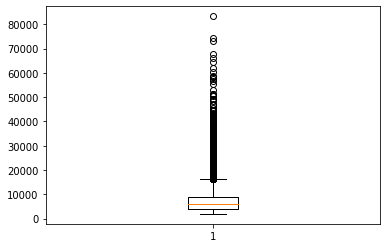

In [27]:
plt.boxplot(df['Customer Lifetime Value'])
plt.show()  #WOW outlier galore

Text(0, 0.5, 'Counts')

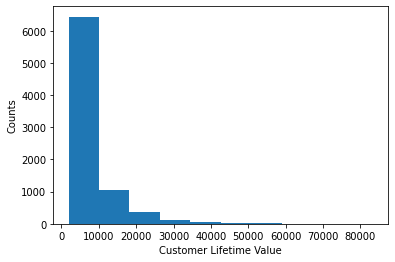

In [28]:
plt.hist(df["Customer Lifetime Value"])
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Counts")

In [29]:
CLV_85_quant = df["Customer Lifetime Value"].quantile(0.85)
print("CLV 85th percentile:", CLV_85_quant)
print()
CLV_90_quant = df["Customer Lifetime Value"].quantile(0.90)
print("CLV 90th percentile:", CLV_90_quant)
print()
CLV_95_quant = df["Customer Lifetime Value"].quantile(0.95)
print("CLV 95th percentile:", CLV_95_quant)
print()
CLV_97_quant = df["Customer Lifetime Value"].quantile(0.97)
print("CLV 97th percentile:", CLV_97_quant)
print()
CLV_100_quant = df["Customer Lifetime Value"].quantile(1)
print("CLV 100th percentile:", CLV_100_quant, " <-- Mad jump!") 

CLV 85th percentile: 12376.385549999999

CLV 90th percentile: 15335.236667999994

CLV 95th percentile: 21924.99620699999

CLV 97th percentile: 25906.05032799995

CLV 100th percentile: 83325.38119  <-- Mad jump!


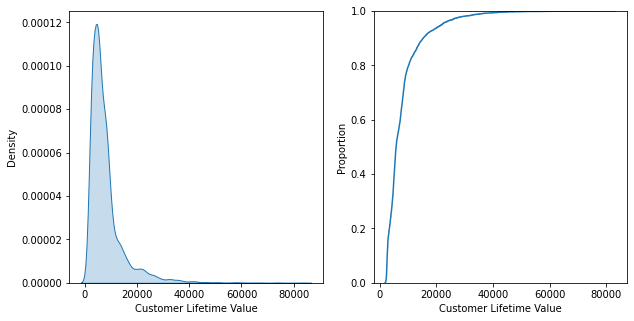

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(ax=axes[0], x=df["Customer Lifetime Value"], shade=True)
sns.ecdfplot(ax=axes[1], x=df["Customer Lifetime Value"])
plt.show()

In [31]:
df[df["Customer Lifetime Value"] < df["Customer Lifetime Value"].quantile(0.25)]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
16,FV94802,Nevada,2566.867823,No,Basic,High School or Below,2011-02-06,Medical Leave,M,25049.0,...,7.0,0.0,1.0,Personal Auto,Personal L3,Offer2,Call Center,454.245098,Two-Door Car,Medsize
17,OE15005,California,3945.241604,No,Basic,College,2011-01-05,Medical Leave,M,28855.0,...,59.0,0.0,1.0,Personal Auto,Personal L2,Offer3,Call Center,647.442031,SUV,Medsize
20,ZK25313,Oregon,2872.051273,No,Basic,High School or Below,2011-02-19,Employed,M,57749.0,...,21.0,0.0,1.0,Personal Auto,Personal L2,Offer1,Branch,355.200000,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,VE85103,Nevada,2449.128459,No,Basic,College,2011-01-08,Medical Leave,M,20567.0,...,76.0,4.0,1.0,Personal Auto,Personal L2,Offer4,Agent,345.600000,Four-Door Car,Large
8081,JX50349,Oregon,2472.469209,Yes,Basic,College,2011-01-20,Employed,F,63860.0,...,81.0,0.0,1.0,Personal Auto,Personal L1,Offer2,Agent,208.598246,Four-Door Car,Medsize
8085,MF87270,California,2952.581331,No,Basic,High School or Below,2011-02-15,Employed,F,57248.0,...,17.0,0.0,1.0,Personal Auto,Personal L3,Offer2,Call Center,355.200000,Four-Door Car,Small
8090,NG15645,California,2858.087414,No,Basic,Master,2011-01-11,Employed,F,27382.0,...,35.0,0.0,1.0,Personal Auto,Personal L2,Offer2,Web,134.104322,Four-Door Car,Medsize


In [32]:
df["Customer Lifetime Value"].skew() #positive skew as noticed in the histogram

3.0836575056198336

In [33]:
pd.set_option('display.max_columns', None)

In [34]:
df_highCLV = df[df["Customer Lifetime Value"] > 30000].sort_values(by="Customer Lifetime Value")
df_highCLV

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
2294,JG76775,Washington,30061.69259,No,Extended,High School or Below,2011-01-29,Employed,M,48258.0,Suburban,Married,249.0,12.0,86.0,0.0,2.0,Personal Auto,Personal L1,Offer1,Branch,1195.200000,Luxury Car,Medsize
7316,LO90163,Nevada,30081.36783,No,Basic,Bachelor,2011-01-23,Employed,F,24626.0,Rural,Married,108.0,19.0,3.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Call Center,225.971279,SUV,Medsize
3203,SM88270,California,30118.65540,No,Premium,High School or Below,2011-01-09,Employed,M,68906.0,Suburban,Married,187.0,12.0,61.0,0.0,2.0,Personal Auto,Personal L3,Offer3,Web,1053.300143,Sports Car,Medsize
2136,BV91898,Arizona,30141.61738,No,Basic,Bachelor,2011-02-03,Unemployed,F,0.0,Suburban,Single,103.0,9.0,72.0,0.0,2.0,Personal Auto,Personal L1,Offer3,Web,1060.310769,SUV,Medsize
5212,CD55111,California,30154.68108,No,Extended,Master,2011-01-02,Employed,M,73359.0,Rural,Married,94.0,17.0,24.0,0.0,2.0,Corporate Auto,Corporate L3,Offer2,Call Center,107.187926,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,SK66747,Washington,66025.75407,No,Basic,Bachelor,2011-02-22,Employed,M,33481.0,Suburban,Single,188.0,28.0,46.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,1194.892002,Luxury SUV,Medsize
7283,KH55886,Oregon,67907.27050,No,Premium,Bachelor,2011-02-05,Employed,M,78310.0,Rural,Married,192.0,34.0,18.0,1.0,2.0,Personal Auto,Personal L1,Offer1,Agent,151.711475,Sports Car,Medsize
6252,BP23267,California,73225.95652,No,Extended,Bachelor,2011-02-09,Employed,F,39547.0,Suburban,Married,202.0,11.0,21.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Branch,969.600000,Luxury SUV,Medsize
1974,YC54142,Washington,74228.51604,No,Extended,High School or Below,2011-01-26,Unemployed,M,0.0,Suburban,Single,242.0,1.0,34.0,0.0,2.0,Personal Auto,Personal L1,Offer1,Branch,1742.400000,Luxury Car,Medsize


In [35]:
len(df[df["Customer Lifetime Value"] > 8000])

2697

In [36]:
df_highCLV.Response.value_counts(normalize=True)

No     0.897436
Yes    0.102564
Name: Response, dtype: float64

In [37]:
df[df["Customer Lifetime Value"] < df["Customer Lifetime Value"].quantile(0.25)].Response.value_counts(normalize=True)

No     0.842469
Yes    0.157531
Name: Response, dtype: float64

In [38]:
df.Response.value_counts(normalize=True) #Majority of the customers responded with a 'No'

No     0.855167
Yes    0.144833
Name: Response, dtype: float64

In [39]:
outliersA = []
outliersB = []
outliersC = []
for i in df["Customer Lifetime Value"]:
    if i > 8000:
        outliersA.append(i)
for j in df["Income"]:
    if j == 0.0:
        outliersB.append(j)
for k in df["Monthly Premium Auto"]:
    if k > 140:
        outliersC.append(k)
outliers = outliersA + outliersB + outliersC
print(len(set(outliers)))

2477


In [40]:
8099 - 2477

5622

Inspite of their being what looks like outliers in a right skewed data, but we can't start messing around with it just yet!

**Let's try to look at different features in this dataset and their relationship with Customer Lifetime Value**

# EDA

In [41]:
df.Income.describe()

count     8099.000000
mean     37843.544265
std      30370.556860
min          0.000000
25%          0.000000
50%      34430.000000
75%      62459.500000
max      99981.000000
Name: Income, dtype: float64

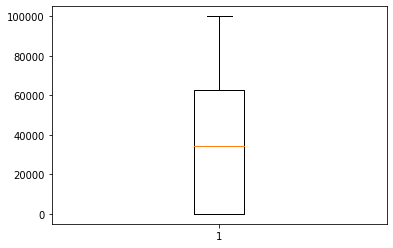

In [42]:
plt.boxplot(df.Income)
plt.show()

Text(0, 0.5, 'Income')

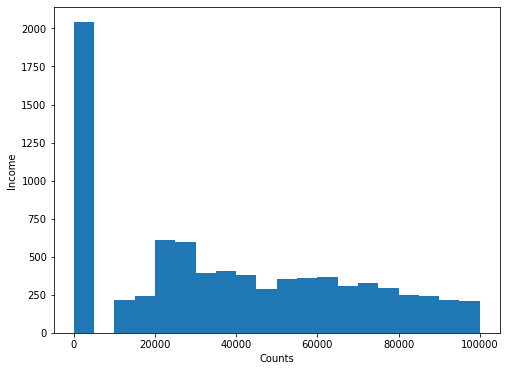

In [43]:
plt.figure(figsize=(8,6))
plt.hist(df.Income, bins=20)
plt.xlabel("Counts")
plt.ylabel("Income")

In [44]:
ran = np.arange(0, 10001)
df["Income"].isin(ran).sum()

2041

In [45]:
len(df[(df.Income>=0) & (df.Income<=10000)])

2041

In [46]:
df.Income.value_counts(bins=7)

(-99.982, 14283.0]    2230
(14283.0, 28566.0]    1324
(28566.0, 42849.0]    1160
(57132.0, 71415.0]     991
(42849.0, 57132.0]     956
(71415.0, 85698.0]     803
(85698.0, 99981.0]     635
Name: Income, dtype: int64

In [47]:
any(df.Income < 0.0)

False

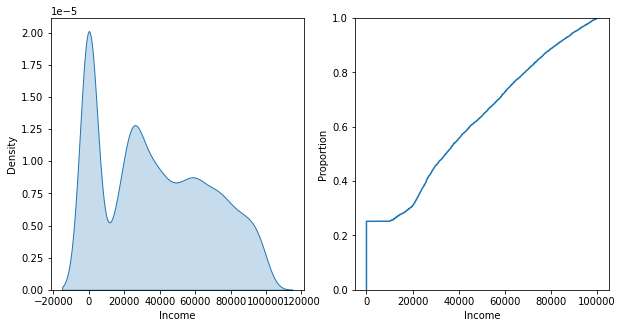

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(ax=axes[0], x=df.Income, shade=True)
sns.ecdfplot(ax=axes[1], x=df.Income)
plt.show()

In [49]:
import scipy.stats as stats

In [50]:
df_numerical = df.select_dtypes("float64")
df_numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879


## Monthly Premium Auto

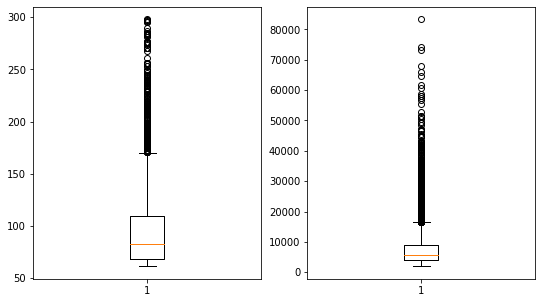

In [51]:
plt.figure(figsize=(9,5))
plt.subplot(121)
plt.boxplot(df_numerical["Monthly Premium Auto"])
plt.subplot(122)
plt.boxplot(df_numerical["Customer Lifetime Value"])
plt.show()    #Outlier Galore

In [52]:
df["Monthly Premium Auto"].describe()

count    8099.000000
mean       93.140758
std        34.381153
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

Text(0, 0.5, 'Monthly Premium Auto')

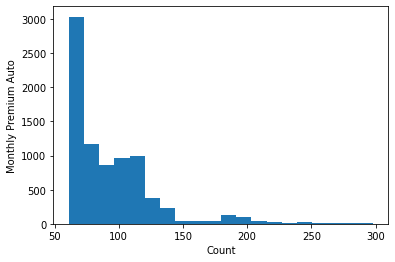

In [53]:
plt.hist(df["Monthly Premium Auto"], bins=20)
plt.xlabel("Count")
plt.ylabel("Monthly Premium Auto")

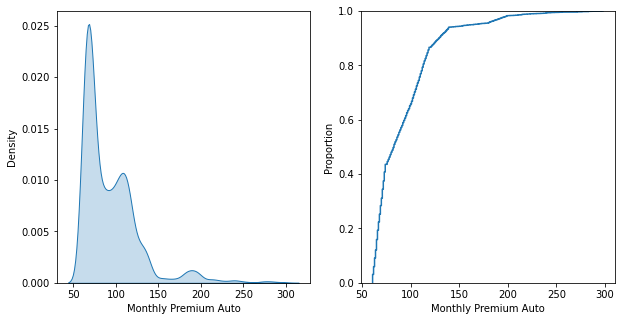

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(ax=axes[0], x=df["Monthly Premium Auto"], shade=True)
sns.ecdfplot(ax=axes[1], x=df["Monthly Premium Auto"])
plt.show()

In [55]:
CLV_MPA_corr, _ = stats.pearsonr(df["Customer Lifetime Value"], df["Monthly Premium Auto"])
CLV_MPA_corr

0.3966231102725107

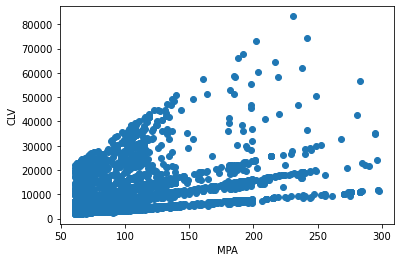

In [56]:
plt.scatter(df_numerical["Monthly Premium Auto"], df_numerical["Customer Lifetime Value"])
plt.xlabel("MPA")
plt.ylabel("CLV")
plt.show()  

CLV and MPA are correlated. However there are other factors that help determine the CLV.
Leaning towards the decision to not eliminate the large values seen in both the boxplots of CLV and MPA.
Ploughing through!!

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

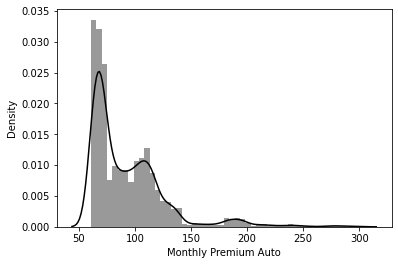

In [57]:
sns.distplot(df["Monthly Premium Auto"], kde=True, color='black')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Monthly Premium Auto'>

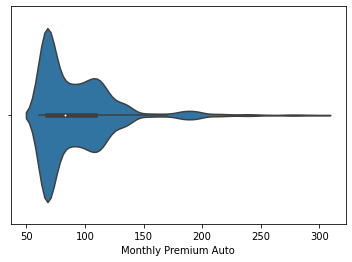

In [58]:
sns.violinplot(df["Monthly Premium Auto"])

In [59]:
corr_numerical = df_numerical.corr()
corr_numerical["Customer Lifetime Value"]

Customer Lifetime Value          1.000000
Income                           0.027449
Monthly Premium Auto             0.396623
Months Since Last Claim          0.013663
Months Since Policy Inception    0.012073
Number of Open Complaints       -0.037664
Number of Policies               0.025158
Total Claim Amount               0.216125
Name: Customer Lifetime Value, dtype: float64

<AxesSubplot:>

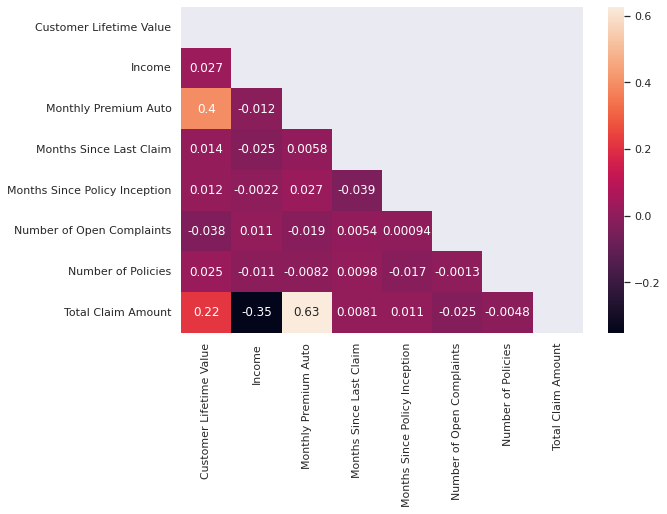

In [60]:
sns.set(rc={'figure.figsize':(9,6)})
matrix = np.triu(corr_numerical)
sns.heatmap(corr_numerical, annot=True, mask=matrix)

## Number of Open Complaints

In [61]:
df_numerical['Number of Open Complaints'].value_counts()

0.0    6413
1.0     897
2.0     340
3.0     271
4.0     128
5.0      50
Name: Number of Open Complaints, dtype: int64

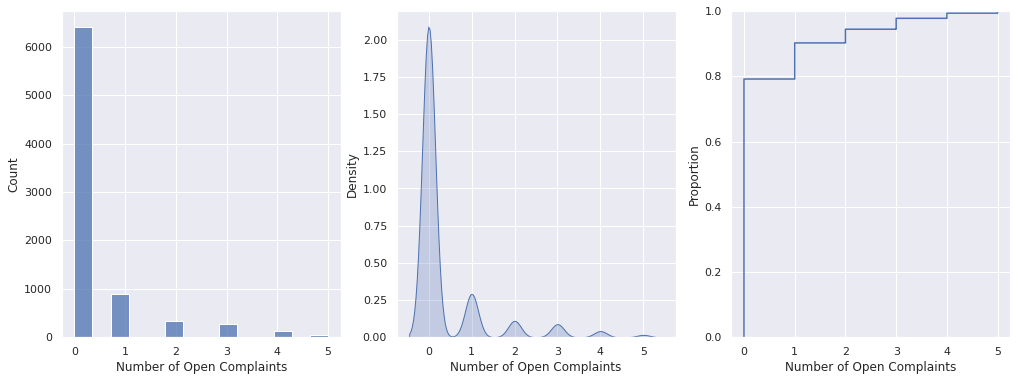

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(17, 6))
sns.histplot(ax=axes[0], x=df_numerical["Number of Open Complaints"])
sns.kdeplot(ax=axes[1], x=df_numerical["Number of Open Complaints"], shade=True)
sns.ecdfplot(ax=axes[2], x=df_numerical["Number of Open Complaints"])
plt.show()

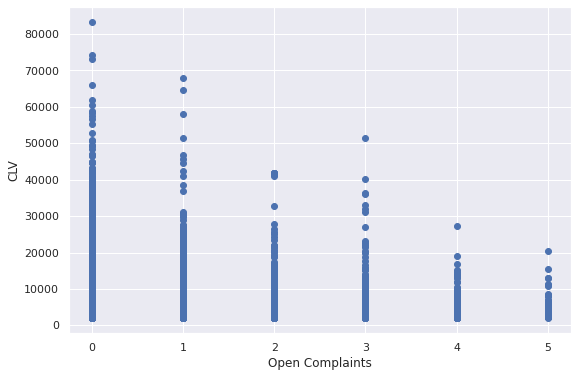

In [63]:
plt.scatter(df_numerical["Number of Open Complaints"], df_numerical["Customer Lifetime Value"])
plt.xlabel("Open Complaints")
plt.ylabel("CLV")
plt.show()  

People with lesser complaints are more likely to have a higher CLV. Hence the negative correlation!

## Total Claim Amount

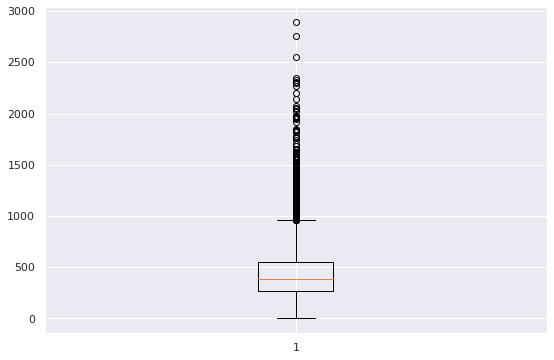

In [64]:
plt.boxplot(df_numerical["Total Claim Amount"])
plt.show()

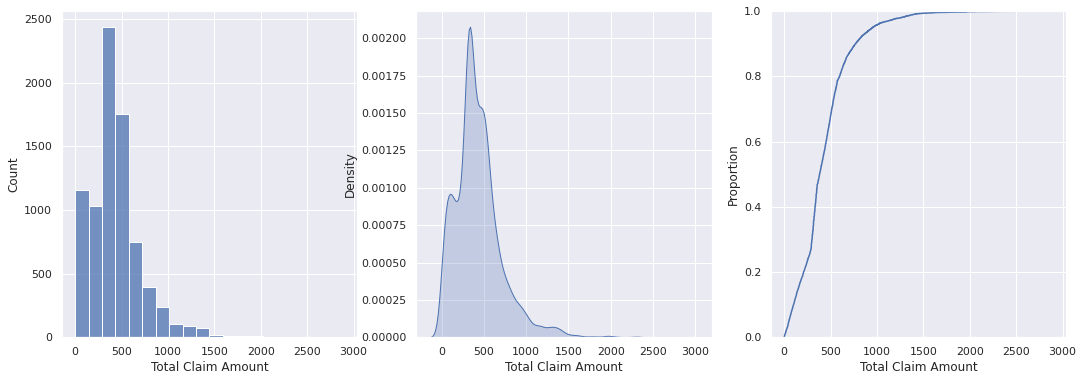

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(ax=axes[0], x=df_numerical["Total Claim Amount"], bins=20)
sns.kdeplot(ax=axes[1], x=df_numerical["Total Claim Amount"], shade=True)
sns.ecdfplot(ax=axes[2], x=df_numerical["Total Claim Amount"])
plt.show()

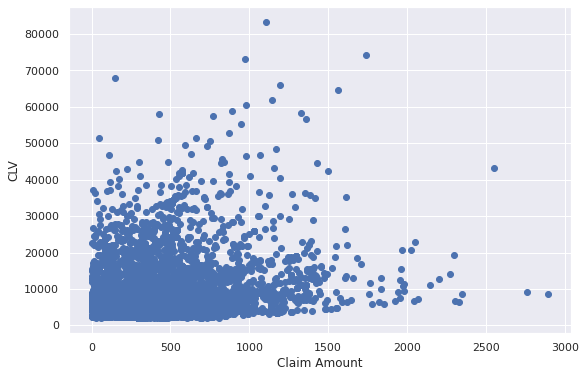

In [66]:
plt.scatter(df["Total Claim Amount"], df["Customer Lifetime Value"])
plt.xlabel("Claim Amount")
plt.ylabel("CLV")
plt.show()

In [67]:
df["Customer Lifetime Value"].skew()   #Positive Skew

3.0836575056198336

Some correlation between CLV and Total Claim Amount. So, the people generally have a claim amount 0-1500. The units are confusing, perhaps it is in thousands of dollars.

## Categorical Features!

In [68]:
df_cat = df.select_dtypes("object")
CLV = df["Customer Lifetime Value"]
df_cat = df_cat.join(CLV)
df_cat.head()
#print(df_cat.shape)

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2763.519279
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,6979.535903
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,12887.431650
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,7645.861827
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2813.692575


## Coverage

<AxesSubplot:xlabel='Coverage', ylabel='Customer Lifetime Value'>

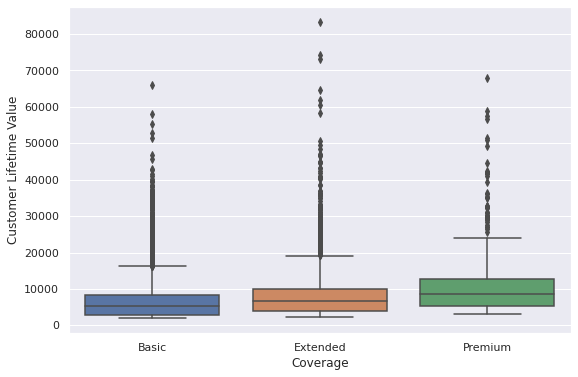

In [69]:
sns.boxplot(data=df_cat, x="Coverage", y="Customer Lifetime Value")

<AxesSubplot:xlabel='Coverage', ylabel='count'>

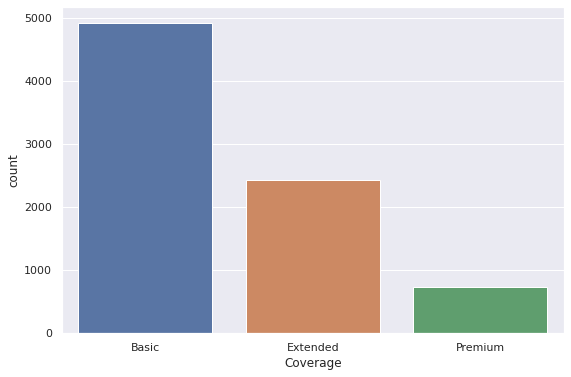

In [70]:
sns.countplot(data=df_cat, x='Coverage')

<AxesSubplot:xlabel='Coverage', ylabel='Customer Lifetime Value'>

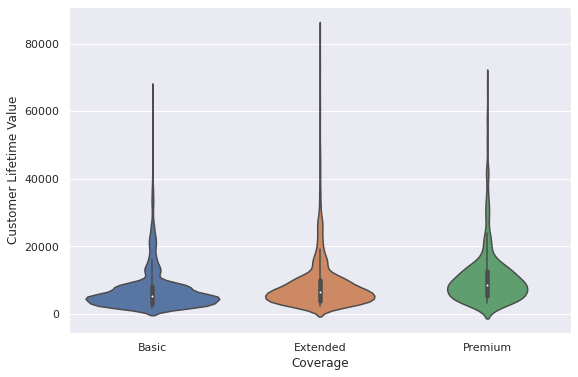

In [71]:
sns.violinplot(data=df_cat, x='Coverage', y='Customer Lifetime Value')

 We'll have to do Chi-squared test and ANOVA test with a few of these variables later

## Education

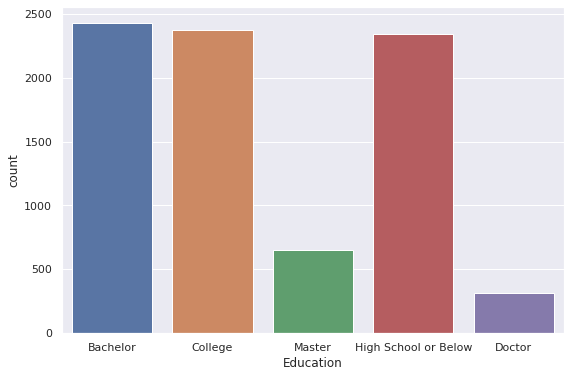

In [72]:
sns.countplot(data=df_cat, x="Education")
plt.show()

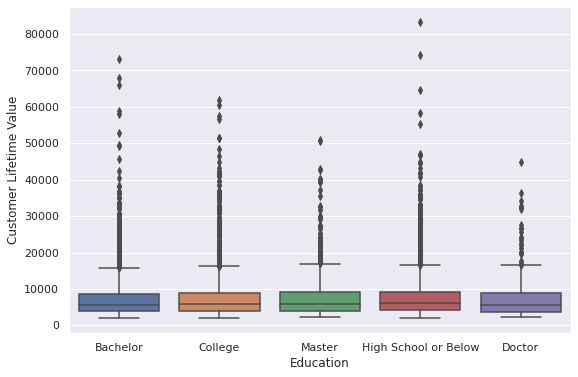

In [73]:
sns.boxplot(data=df_cat, x="Education", y="Customer Lifetime Value")
plt.show()

About the same effect of each Qualification, Let's build a function to make your lives easier!

### Function to plot categorical features

In [74]:
def plot_categorical(data, x_feat, y_feat, row, col, w, h):
    fig , axes = plt.subplots(row, col, figsize=(w,h))
    sns.countplot(ax=axes[0], data=data, x=x_feat)
    sns.boxplot(ax=axes[1], data=data, x=x_feat, y=y_feat)
    sns.violinplot(ax=axes[2], data=data, x=x_feat, y=y_feat)
    plt.show()

## Gender, Marital Status and Location code

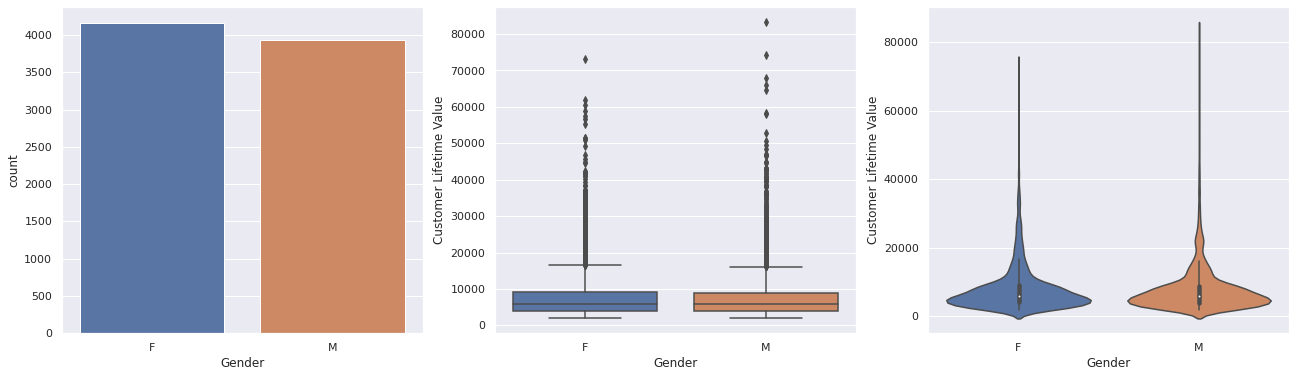

In [75]:
plot_categorical(data=df_cat, x_feat="Gender", y_feat="Customer Lifetime Value", row=1, col=3, w=22, h=6)

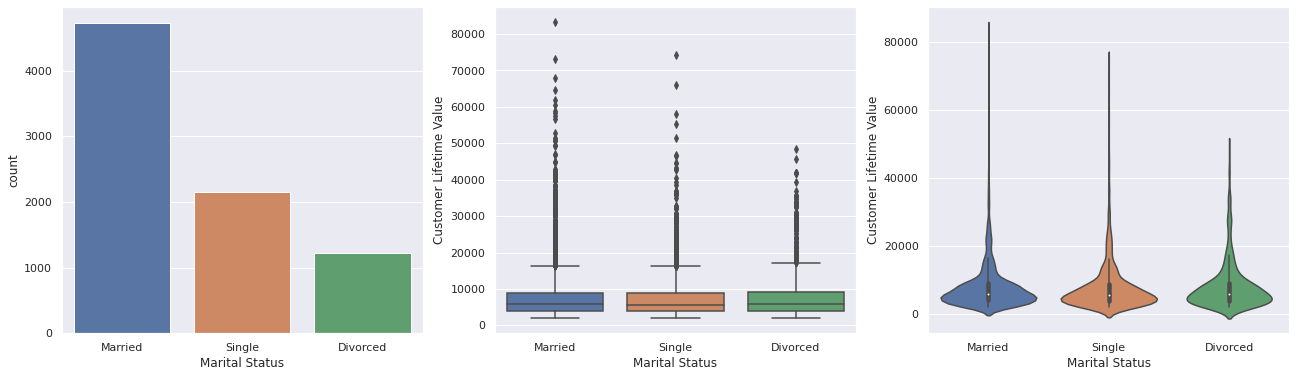

In [76]:
plot_categorical(data=df_cat, x_feat="Marital Status", y_feat="Customer Lifetime Value", row=1, col=3, w=22, h=6)

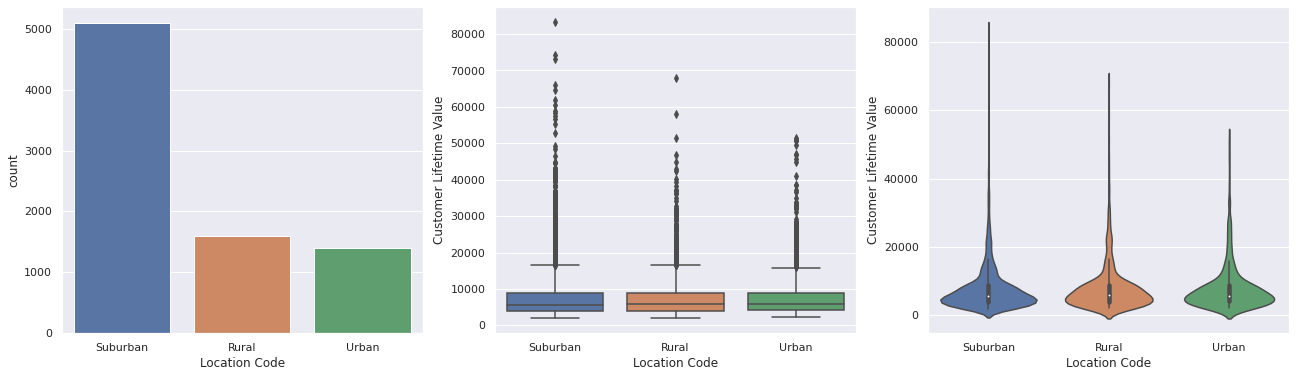

In [77]:
plot_categorical(df_cat, "Location Code", "Customer Lifetime Value", row=1, col=3, w=22, h=6)

In [78]:
df_cat.groupby(["Gender"]).mean().sort_values(by="Customer Lifetime Value", ascending=False)

,Customer Lifetime Value
Gender,
F,8077.634205
M,7879.300692


In [79]:
df_cat.groupby(["Marital Status"]).mean().sort_values(by="Customer Lifetime Value", ascending=False)

,Customer Lifetime Value
Marital Status,
Divorced,8202.580282
Married,8040.411108
Single,7726.200905


In [80]:
df_cat.groupby(["Location Code"]).mean().sort_values(by="Customer Lifetime Value", ascending=False)

,Customer Lifetime Value
Location Code,
Urban,8034.724208
Rural,7992.183349
Suburban,7963.140446


There are more female clients than male, hence bringing in a better average CLV.
Marital Status and Location Code are strikingly similar. Married people are the most popular and seems as though they are mostly from a suburban setting. While divorced clients seem to bring the best mean CLV. Rural clients seem to be bringing in a better CLV than the suburban clients.

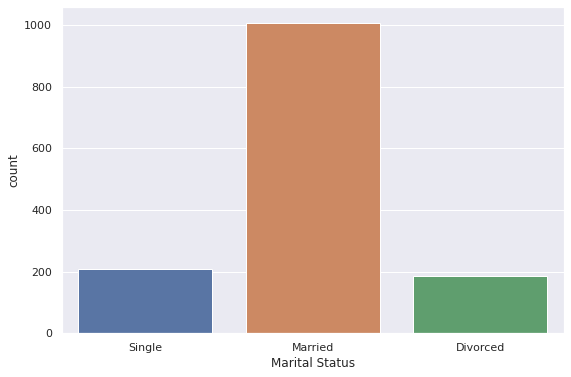

Married     1008
Single       209
Divorced     186
Name: Marital Status, dtype: int64


In [81]:
urban_marital_status = df_cat.loc[df["Location Code"] == "Urban"]
sns.countplot(data=urban_marital_status, x="Marital Status")
plt.show()
print(urban_marital_status["Marital Status"].value_counts())

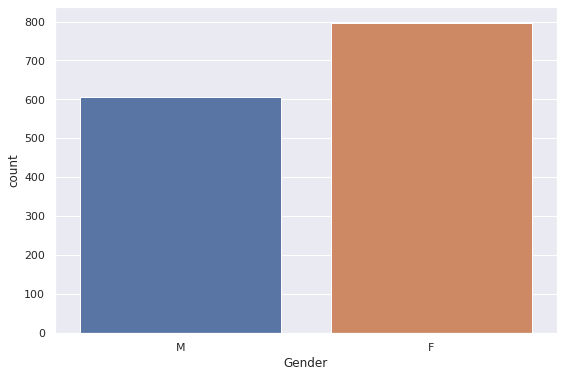

F    797
M    606
Name: Gender, dtype: int64


In [82]:
#urban_marital_status = df_cat.loc[df["Location Code"] == "Urban"]
sns.countplot(data=urban_marital_status, x="Gender")
plt.show()
print(urban_marital_status["Gender"].value_counts())

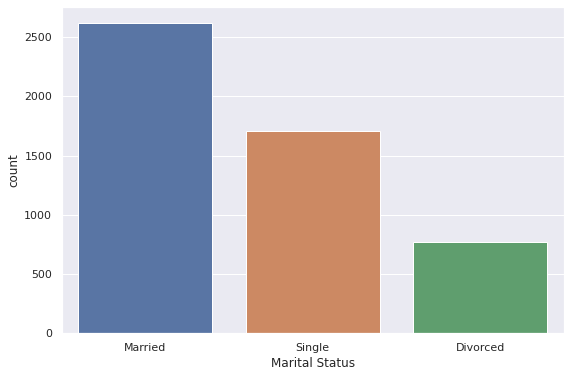

Married     2622
Single      1707
Divorced     769
Name: Marital Status, dtype: int64


In [83]:
suburban_marital_status = df_cat.loc[df["Location Code"] == "Suburban"]
sns.countplot(data=suburban_marital_status, x="Marital Status")
plt.show()
print(suburban_marital_status["Marital Status"].value_counts())

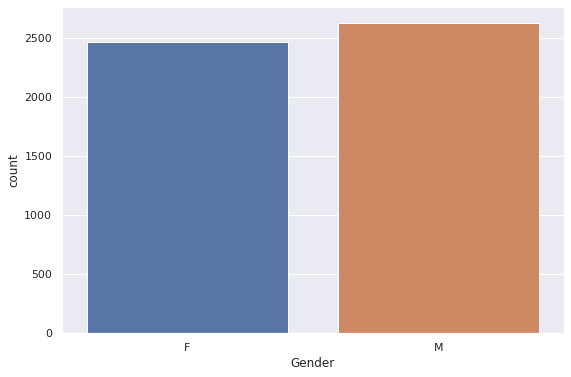

M    2632
F    2466
Name: Gender, dtype: int64


In [84]:
#suburban_marital_status = df_cat.loc[df["Location Code"] == "Suburban"]
sns.countplot(data=suburban_marital_status, x="Gender")
plt.show()
print(suburban_marital_status["Gender"].value_counts())

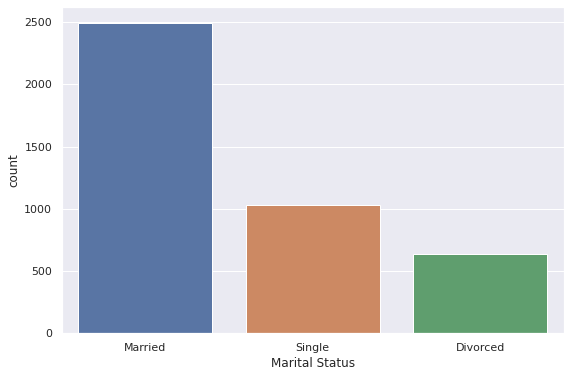

Married     2495
Single      1034
Divorced     635
Name: Marital Status, dtype: int64


In [85]:
female_marital_status = df_cat.loc[df["Gender"] == "F"]
sns.countplot(data=female_marital_status, x="Marital Status")
plt.show()
print(female_marital_status["Marital Status"].value_counts())

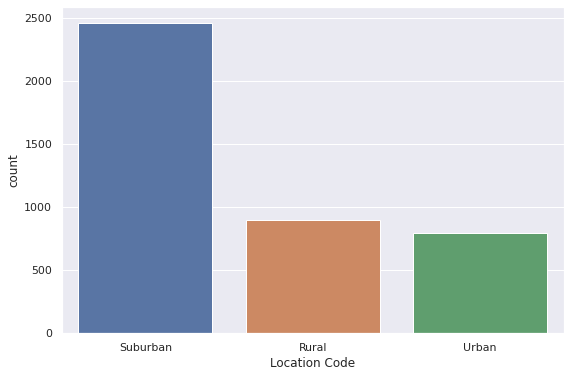

Suburban    2466
Rural        901
Urban        797
Name: Location Code, dtype: int64


In [86]:
sns.countplot(data=female_marital_status, x="Location Code")
plt.show()
print(female_marital_status["Location Code"].value_counts())

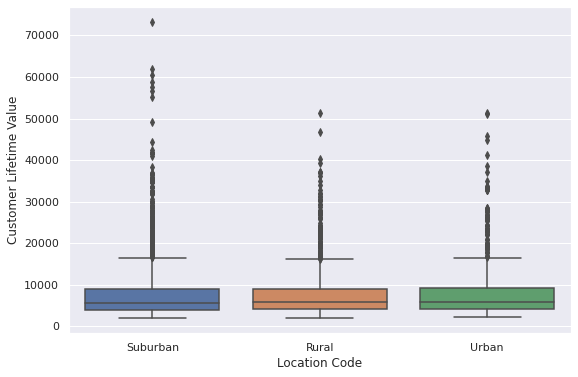

In [87]:
sns.boxplot(data=female_marital_status, x="Location Code", y="Customer Lifetime Value")
plt.show()

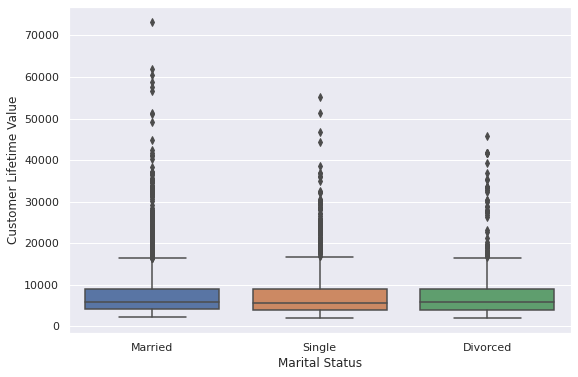

In [88]:
sns.boxplot(data=female_marital_status, x="Marital Status", y="Customer Lifetime Value")
plt.show()

Married Suburban Female clients tend to bring in the most profit!

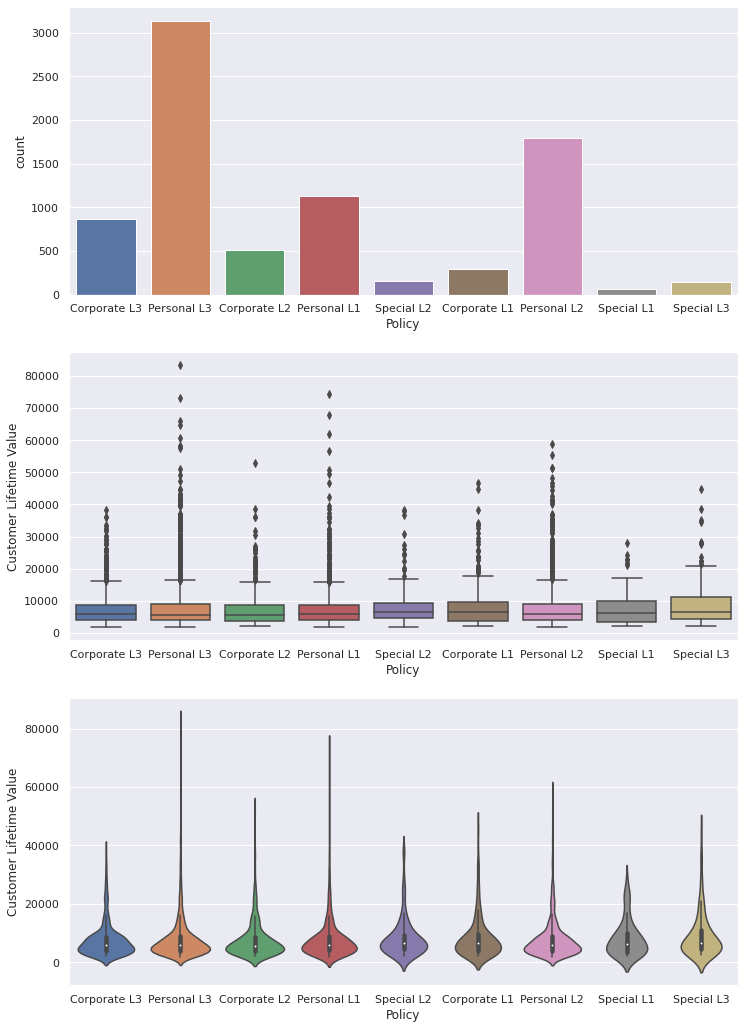

In [89]:
plot_categorical(data=df_cat, x_feat="Policy", y_feat="Customer Lifetime Value", row=3, col=1, w=12, h=18)

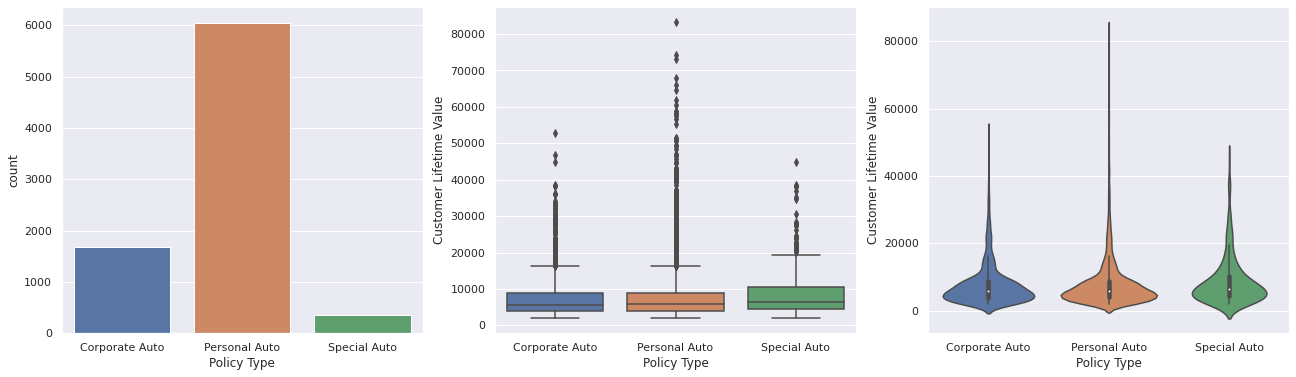

In [90]:
plot_categorical(data=df_cat, x_feat="Policy Type", y_feat="Customer Lifetime Value", row=1, col=3, w=22, h=6)

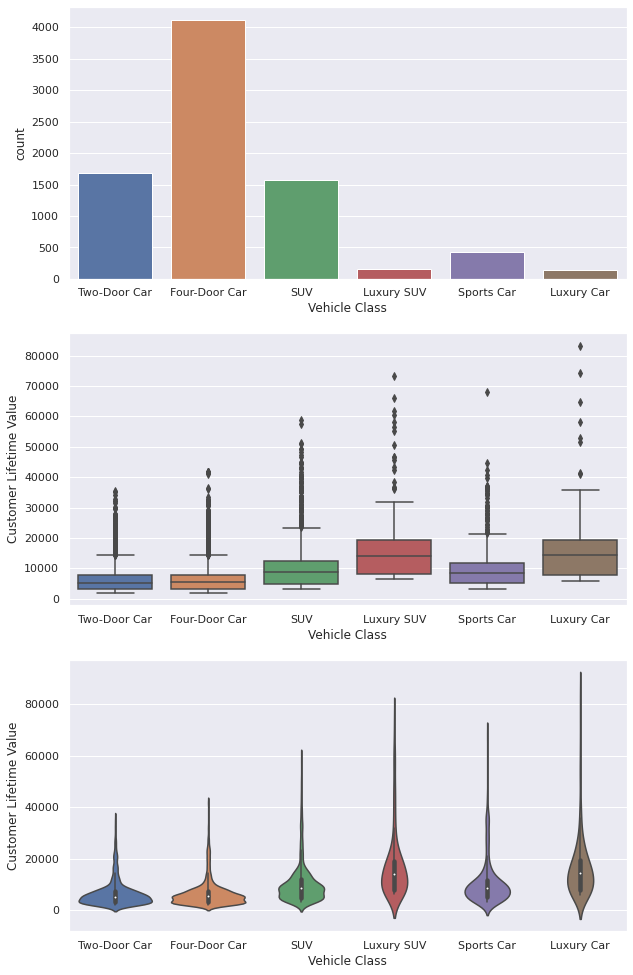

In [91]:
plot_categorical(data=df_cat, x_feat="Vehicle Class", y_feat="Customer Lifetime Value", row=3, col=1, w=10, h=17)

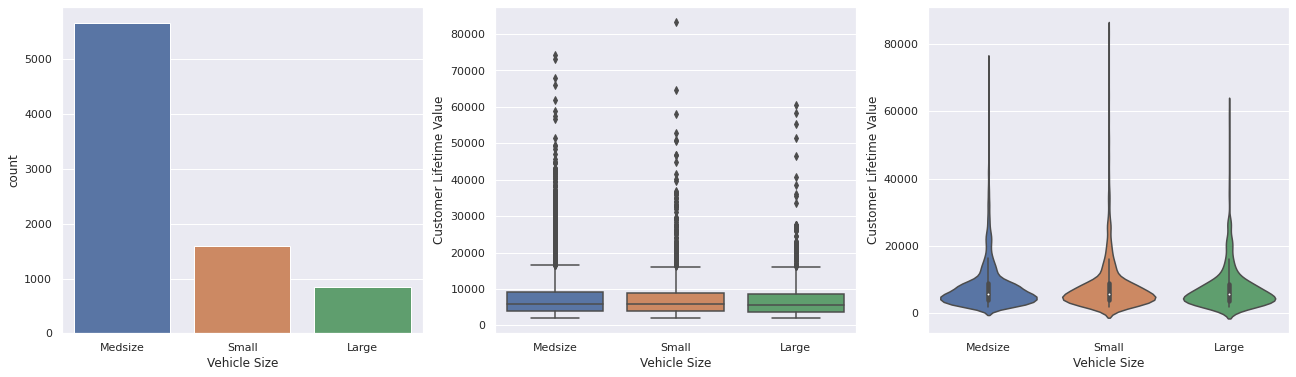

In [92]:
plot_categorical(data=df_cat, x_feat="Vehicle Size", y_feat="Customer Lifetime Value", row=1, col=3, w=22, h=6)

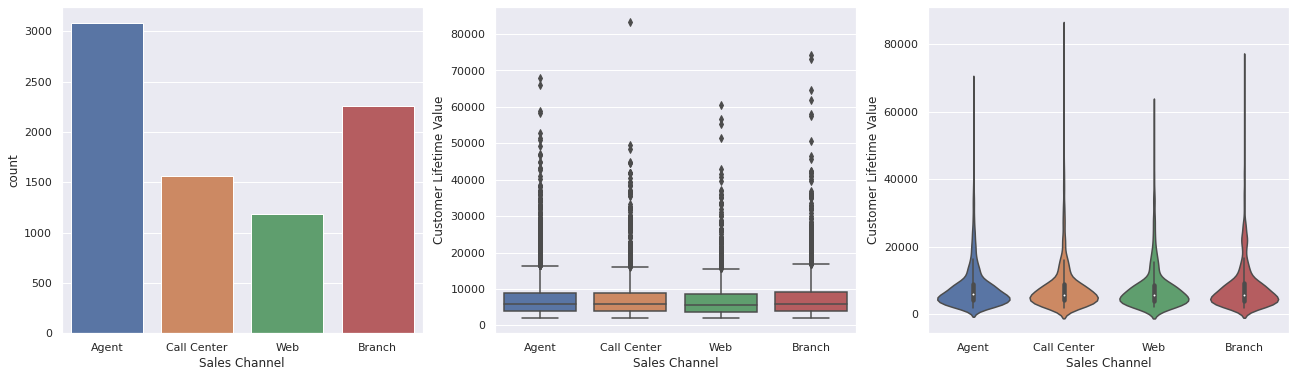

In [93]:
plot_categorical(data=df_cat, x_feat="Sales Channel", y_feat="Customer Lifetime Value", row=1, col=3, w=22, h=6)

## Bivariate Analysis

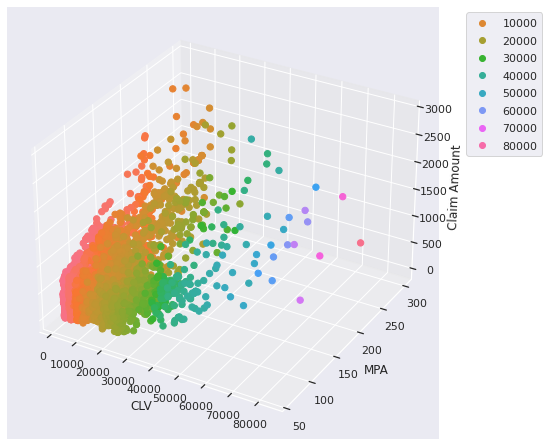

In [94]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
x = df_numerical["Customer Lifetime Value"]
y= df_numerical["Monthly Premium Auto"]
z = df_numerical["Total Claim Amount"]

sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('CLV')
ax.set_ylabel('MPA')
ax.set_zlabel('Claim Amount')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

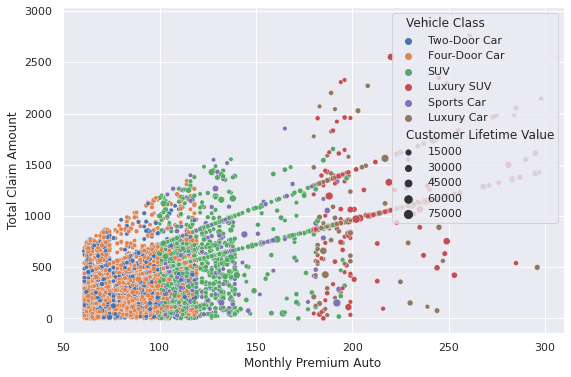

In [95]:
sns.scatterplot(data=df, x="Monthly Premium Auto", y="Total Claim Amount", hue="Vehicle Class", size="Customer Lifetime Value")
plt.show()

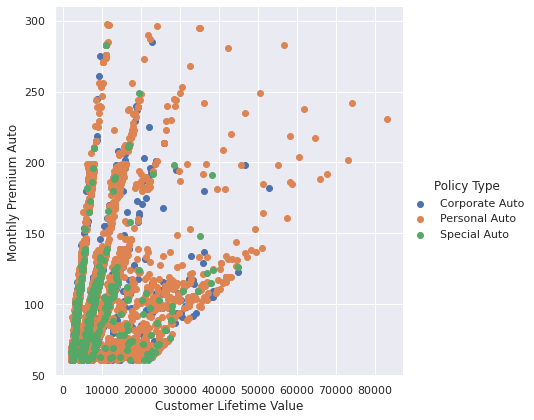

In [96]:
sns.FacetGrid(df, hue="Policy Type", height=6).map(plt.scatter, "Customer Lifetime Value", "Monthly Premium Auto").add_legend()
plt.show()

Could be a case of the People with Special Auto Policy are charged with lesser Premiums and also being irresponsible with their vehicles because their CLV isn't a lot and could be causing the company some damage.

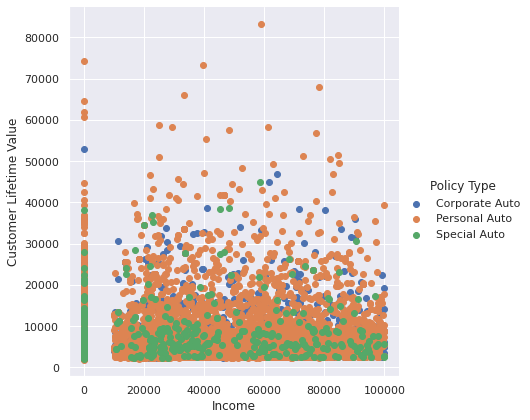

In [97]:
sns.FacetGrid(df, hue="Policy Type", height=6).map(plt.scatter, "Income", "Customer Lifetime Value").add_legend()
plt.show()

Clients with Personal Policies are the most profitable whereas the Special Auto Policy type are the least.

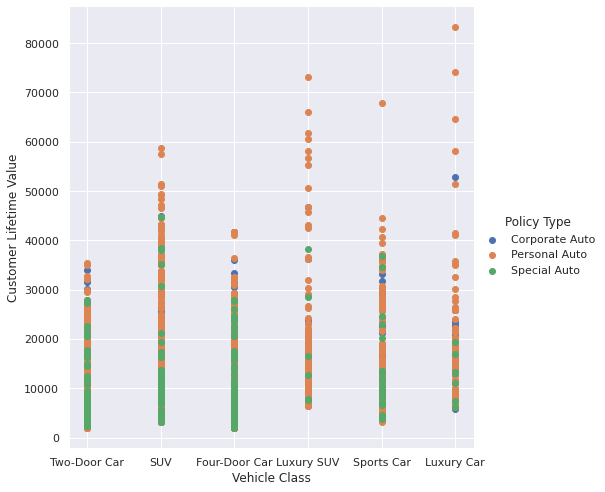

In [98]:
sns.FacetGrid(df, hue="Policy Type", height=7).map(plt.scatter, "Vehicle Class", "Customer Lifetime Value").add_legend()
plt.show()

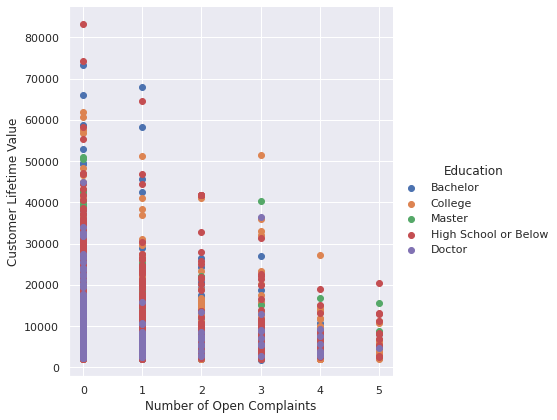

In [99]:
sns.FacetGrid(df, hue="Education", height=6).map(plt.scatter, "Number of Open Complaints", "Customer Lifetime Value").add_legend()
plt.show()

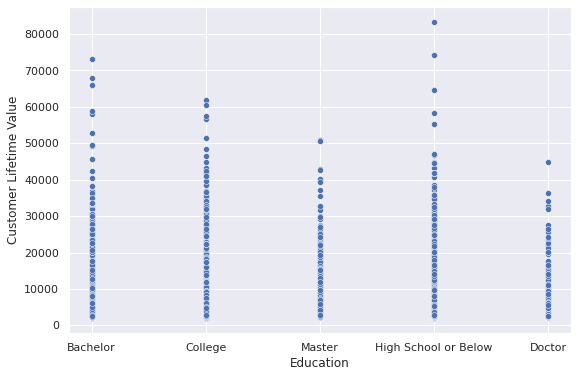

In [100]:
sns.scatterplot(data=df, x="Education", y="Customer Lifetime Value")
plt.show()

## Multivariate Analysis

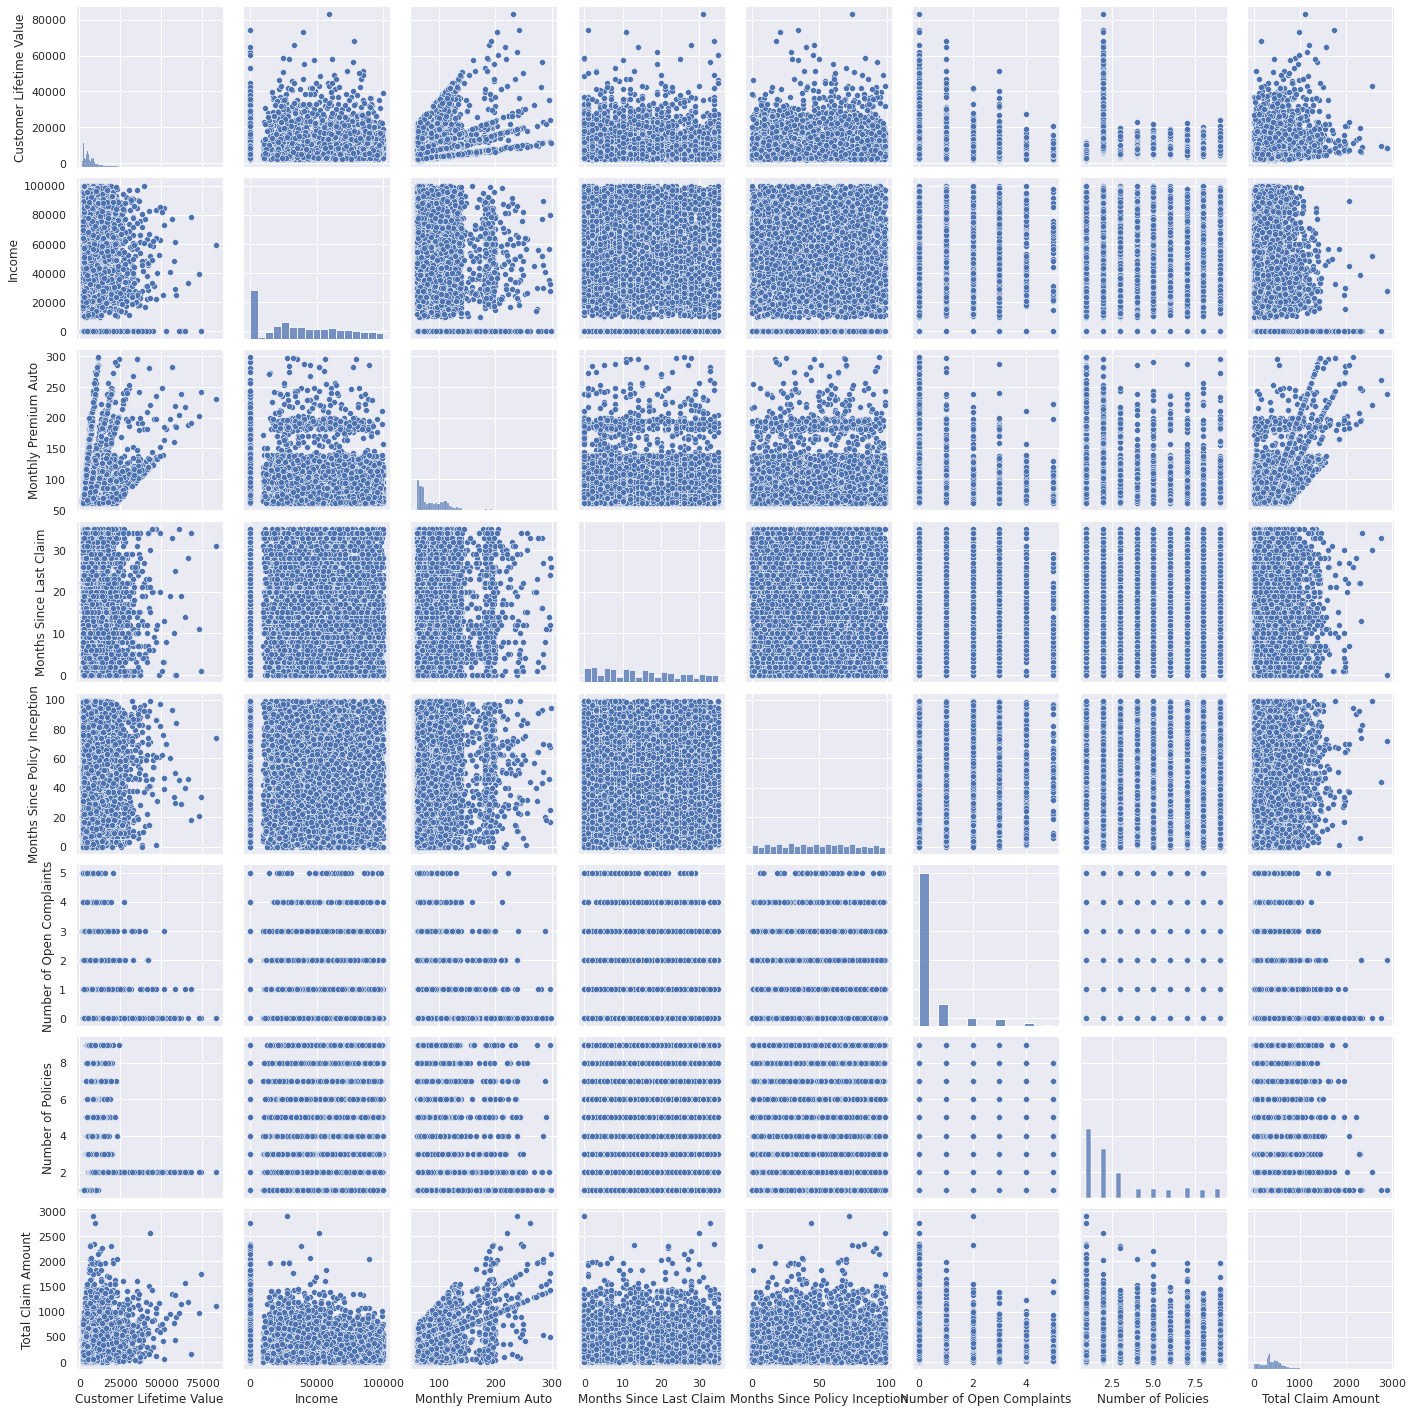

In [101]:
sns.pairplot(df_numerical)
plt.show()

# Significance Testing

### 2Sample T-test between the genders

In [102]:
female_clv = df_cat[df_cat["Gender"] == "F"]["Customer Lifetime Value"]
male_clv = df_cat[df_cat["Gender"] == "M"]["Customer Lifetime Value"]
#print("Female mean: ", female_mean, "Male mean: ", male_mean)

H0: Female and male clients are equally profitable

HA: Female clients are more profitable

In [103]:
t_test, p_value = stats.ttest_ind(a=female_clv, b=male_clv, equal_var=False)

In [104]:
if p_value < 0.05:
    print("Reject the Null Hypothesis")
else:
    print("Accept the Null Hypothesis")

Accept the Null Hypothesis


In [105]:
print(p_value)

0.19245445161343525


Females have a better mean CLV because of the higher population of females perhaps. So, they're there is no proper evidence that the female clients are more profitable. 

In [106]:
df_cat["Customer Lifetime Value"].mean()

7981.271397766537

Chi Squared Test between policy type and vehicle class

In [107]:
table_1 = pd.crosstab(df_cat["Policy Type"], df_cat["Vehicle Class"])
print(table_1)

Vehicle Class   Four-Door Car  Luxury Car  Luxury SUV   SUV  Sports Car  \
Policy Type                                                               
Corporate Auto            844          33          29   329          91   
Personal Auto            3075         105         131  1166         320   
Special Auto              191           7           6    70          25   

Vehicle Class   Two-Door Car  
Policy Type                   
Corporate Auto           356  
Personal Auto           1256  
Special Auto              65  


In [108]:
obs_vals = table_1.values
print(obs_vals)

[[ 844   33   29  329   91  356]
 [3075  105  131 1166  320 1256]
 [ 191    7    6   70   25   65]]


In [109]:
val = stats.chi2_contingency(table_1)
print(val)

(5.548185715302169, 0.8516882539461037, 10, array([[ 853.56463761,   30.11359427,   34.47487344,  325.01913817,
          90.54846277,  348.27929374],
       [3071.71626127,  108.3695518 ,  124.0644524 , 1169.64378318,
         325.85603161, 1253.34991974],
       [ 184.71910112,    6.51685393,    7.46067416,   70.33707865,
          19.59550562,   75.37078652]]))


In [110]:
exp_val = val[3]

In [111]:
no_rows = table_1.shape[0]
no_cols = table_1.shape[1]
deg_of_free = (no_rows-1) * (no_cols-1)
print("Degrees of Freedom:", deg_of_free)
alpha = 0.05

Degrees of Freedom: 10


In [112]:
from scipy.stats import chi2
chi_sq = sum([(o-e)**2./e for o,e in zip(obs_vals, exp_val)])
chi_sq_stat = 0
for i in chi_sq:
    chi_sq_stat += i
print("chi_squared:", chi_sq)
print("Chi Squared statistic:", chi_sq_stat)

chi_squared: [0.324253   0.41725315 1.5431435  0.06172478 1.59806616 1.60374514]
Chi Squared statistic: 5.54818571530217


In [113]:
critical_val = chi2.ppf(q=1-alpha, df=deg_of_free)
print("Critical value:", critical_val)

Critical value: 18.307038053275146


In [114]:
p_value = 1-chi2.cdf(x=chi_sq_stat, df=deg_of_free)
print("p_value:", p_value)
print("Significance level:", alpha)
print("Degrees of Freedom:", deg_of_free)

p_value: 0.8516882539461035
Significance level: 0.05
Degrees of Freedom: 10


In [115]:
if chi_sq_stat >= critical_val:
    print("Reject H0, there is a relationship b/w the 2 categorical features")
else:
    print("Retain H0, there is no relationship b/w the 2 categorical features")
    
if p_value <= alpha:
    print("Reject H0, there is a relationship b/w the 2 categorical features")
else:
    print("Retain H0, there is no relationship b/w the 2 categorical features")

Retain H0, there is no relationship b/w the 2 categorical features
Retain H0, there is no relationship b/w the 2 categorical features


## ANOVA Test

In [116]:
from scipy.stats import f_oneway

ANOVA test to compare categorical variables with CLV. alpha = 0.05!

### Policy Type

In [117]:
df_cat["Policy Type"].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [118]:
policy_corp = df_cat.loc[df_cat["Policy Type"] == 'Corporate Auto']["Customer Lifetime Value"]
policy_pers = df_cat.loc[df_cat["Policy Type"] == 'Personal Auto']["Customer Lifetime Value"]
policy_spec = df_cat.loc[df_cat["Policy Type"] == 'Special Auto']["Customer Lifetime Value"]

In [119]:
anova_policy_type = f_oneway(policy_corp, policy_pers, policy_spec)
print(anova_policy_type)

F_onewayResult(statistic=2.9023188146480394, pvalue=0.05495289774871119)


Just over the threshold! H0 stays and therefore the 2 features are not significant

### Vehicle Class

In [120]:
veh_class_vals = df_cat["Vehicle Class"].unique()
print(veh_class_vals)

['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']


In [121]:
vehicle_1 = df_cat.loc[df_cat["Vehicle Class"] == veh_class_vals[0]]["Customer Lifetime Value"]
vehicle_2 = df_cat.loc[df_cat["Vehicle Class"] == veh_class_vals[1]]["Customer Lifetime Value"]
vehicle_3 = df_cat.loc[df_cat["Vehicle Class"] == veh_class_vals[2]]["Customer Lifetime Value"]
vehicle_4 = df_cat.loc[df_cat["Vehicle Class"] == veh_class_vals[3]]["Customer Lifetime Value"]
vehicle_5 = df_cat.loc[df_cat["Vehicle Class"] == veh_class_vals[4]]["Customer Lifetime Value"]
vehicle_6 = df_cat.loc[df_cat["Vehicle Class"] == veh_class_vals[5]]["Customer Lifetime Value"]

anova_veh_class = f_oneway(vehicle_1, vehicle_2, vehicle_3, vehicle_4, vehicle_5, vehicle_6)
print(anova_veh_class)

if anova_veh_class[1] <= alpha:
    print("Reject H0, there is a relationship b/w the 2 features")
else:
    print("Retain H0, there is no relationship b/w the 2 features")

F_onewayResult(statistic=237.80332468670693, pvalue=1.1223195666158463e-237)
Reject H0, there is a relationship b/w the 2 features


### Marital Status and Location Code

In [122]:
marital_stat = df_cat["Marital Status"].unique()
print(marital_stat)

['Married' 'Single' 'Divorced']


In [123]:
marital_1 = df_cat.loc[df_cat["Marital Status"] == marital_stat[0]]["Customer Lifetime Value"]
marital_2 = df_cat.loc[df_cat["Marital Status"] == marital_stat[1]]["Customer Lifetime Value"]
marital_3 = df_cat.loc[df_cat["Marital Status"] == marital_stat[2]]["Customer Lifetime Value"]


anova_marital_stat = f_oneway(marital_1, marital_2, marital_3)
print(anova_marital_stat)

if anova_marital_stat[1] <= alpha:
    print("Reject H0, there is a relationship b/w the 2 features")
else:
    print("Retain H0, there is no relationship b/w the 2 features")

F_onewayResult(statistic=2.307085590159379, pvalue=0.09961640703857123)
Retain H0, there is no relationship b/w the 2 features


In [124]:
location = df_cat["Location Code"].unique()
print(location)

['Suburban' 'Rural' 'Urban']


In [125]:
location_1 = df_cat.loc[df_cat["Location Code"] == location[0]]["Customer Lifetime Value"]
location_2 = df_cat.loc[df_cat["Location Code"] == location[1]]["Customer Lifetime Value"]
location_3 = df_cat.loc[df_cat["Location Code"] == location[2]]["Customer Lifetime Value"]


anova_location = f_oneway(location_1, location_2, location_3)
print(anova_location)

if anova_location[1] <= alpha:
    print("Reject H0, there is a relationship b/w the 2 features")
else:
    print("Retain H0, there is no relationship b/w the 2 features")

F_onewayResult(statistic=0.06263623974114212, pvalue=0.9392855413094953)
Retain H0, there is no relationship b/w the 2 features


### Sales Channel and Renew Offer type

In [126]:
sales_channel = df_cat["Sales Channel"].unique()
print(sales_channel)

['Agent' 'Call Center' 'Web' 'Branch']


In [127]:
sales_1 = df_cat.loc[df_cat["Sales Channel"] == sales_channel[0]]["Customer Lifetime Value"]
sales_2 = df_cat.loc[df_cat["Sales Channel"] == sales_channel[1]]["Customer Lifetime Value"]
sales_3 = df_cat.loc[df_cat["Sales Channel"] == sales_channel[2]]["Customer Lifetime Value"]
sales_4 = df_cat.loc[df_cat["Sales Channel"] == sales_channel[3]]["Customer Lifetime Value"]

anova_sales_channel = f_oneway(sales_1, sales_2, sales_3, sales_4)
print(anova_sales_channel)

if anova_sales_channel[1] <= alpha:
    print("Reject H0, there is a relationship b/w the 2 features")
else:
    print("Retain H0, there is no relationship b/w the 2 features")

F_onewayResult(statistic=0.6637404444834136, pvalue=0.5742561031363222)
Retain H0, there is no relationship b/w the 2 features


In [128]:
renew_off = df_cat["Renew Offer Type"].unique()
print(renew_off)

['Offer1' 'Offer3' 'Offer2' 'Offer4']


In [129]:
renew_1 = df_cat.loc[df_cat["Renew Offer Type"] == renew_off[0]]["Customer Lifetime Value"]
renew_2 = df_cat.loc[df_cat["Renew Offer Type"] == renew_off[1]]["Customer Lifetime Value"]
renew_3 = df_cat.loc[df_cat["Renew Offer Type"] == renew_off[2]]["Customer Lifetime Value"]
renew_4 = df_cat.loc[df_cat["Renew Offer Type"] == renew_off[3]]["Customer Lifetime Value"]

anova_renew_offer = f_oneway(renew_1, renew_2, renew_3, renew_4)
print(anova_renew_offer)

if anova_renew_offer[1] <= alpha:
    print("Reject H0, there is a relationship b/w the 2 features")
else:
    print("Retain H0, there is no relationship b/w the 2 features")

F_onewayResult(statistic=26.38795341516023, pvalue=5.595148783482246e-17)
Reject H0, there is a relationship b/w the 2 features


In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Feature Selection and Categorical Encoding

In [131]:
from sklearn.preprocessing import LabelEncoder
df_cat = df_cat.drop("Customer Lifetime Value", axis=1)

In [132]:
df_cat.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [133]:
lab_encod = LabelEncoder()
for i in df_cat:
    df_cat[i] = lab_encod.fit_transform(df_cat[i])
df_cat.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,517,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,5243,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,81,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,7106,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,2179,4,0,0,0,1,1,0,2,1,3,0,0,0,1


In [134]:
df_encod = pd.concat([df_numerical, df_cat], axis=1)
df_encod.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,517,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935,5243,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,81,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,7106,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,2179,4,0,0,0,1,1,0,2,1,3,0,0,0,1


In [135]:
X = df_encod.drop('Customer Lifetime Value', axis=1)
y = df_encod.iloc[:, 0] #CLV

In [136]:
X.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,517,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935,5243,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,81,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,7106,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,2179,4,0,0,0,1,1,0,2,1,3,0,0,0,1


In [137]:
best_features = SelectKBest(score_func=mutual_info_regression, k='all')
fit = best_features.fit(X, np.log(y))

In [138]:
dfscores = pd.DataFrame(fit.scores_)
dfcols = pd.DataFrame(X.columns)

In [139]:
featureScore = pd.concat([dfscores, dfcols], axis=1)
featureScore.columns = ["Score", "Feature"]
featureScore

,Score,Feature
0,0.913431,Income
1,1.670279,Monthly Premium Auto
2,0.469625,Months Since Last Claim
3,0.610595,Months Since Policy Inception
4,0.096902,Number of Open Complaints
5,0.787985,Number of Policies
6,1.096795,Total Claim Amount
7,0.004535,Customer
8,0.000000,State
9,0.321939,Response


In [140]:
print(featureScore.nlargest(10, "Score"))

       Score                        Feature
1   1.670279           Monthly Premium Auto
6   1.096795             Total Claim Amount
0   0.913431                         Income
5   0.787985             Number of Policies
3   0.610595  Months Since Policy Inception
2   0.469625        Months Since Last Claim
10  0.322620                       Coverage
9   0.321939                       Response
20  0.316364                  Vehicle Class
12  0.218927               EmploymentStatus


In [141]:
best_feat = ['Income', 'Total Claim Amount', 'Monthly Premium Auto', 'Months Since Policy Inception',
             'Coverage', 'Vehicle Class', 'Months Since Last Claim', 'Number of Policies', 'Response', 'EmploymentStatus',
            'Renew Offer Type']

### Heteroskedasticity Test

In [142]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

In [143]:
x = sm.add_constant(X)
y = df_encod["Customer Lifetime Value"]
stats_mod = sm.OLS(y, x).fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [144]:
x.shape

(8099, 23)

In [145]:
bp_test = het_breuschpagan(stats_mod.resid, stats_mod.model.exog)

In [146]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
op_dict = dict(zip(labels, bp_test))
print(op_dict)

{'LM Statistic': 488.0801202237219, 'LM-Test p-value': 2.226840284136382e-89, 'F-Statistic': 23.541145863092837, 'F-Test p-value': 2.102134426040853e-92}


In [147]:
if op_dict["F-Test p-value"] <= 0.05:
    print("The dataset is Heteroskedastic")
else:
    print("The dataset is Homoskedastic")

The dataset is Heteroskedastic


Dataset is heteroskedastic.
Homoskedastic = E(y|x1,x2,...,x23) == var A case where all the variables have a constant residual w.r.t the dependent variable. This is however not the case and we should therefore fix this by applying natural logrithm to the dependent variable.

# Model Selection and train test split

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [149]:
np.random.seed(42)

In [150]:
X_best = X[best_feat]
X_best.head()

,Income,Total Claim Amount,Monthly Premium Auto,Months Since Policy Inception,Coverage,Vehicle Class,Months Since Last Claim,Number of Policies,Response,EmploymentStatus,Renew Offer Type
0,56274.0,384.811147,69.0,5.0,0,5,32.0,1.0,0,1,0
1,0.0,1131.464935,94.0,42.0,1,0,13.0,8.0,0,4,2
2,48767.0,566.472247,108.0,38.0,2,5,18.0,2.0,0,1,0
3,0.0,529.881344,106.0,65.0,0,3,18.0,7.0,0,4,0
4,43836.0,138.130879,73.0,44.0,0,0,12.0,1.0,0,1,0


In [151]:
print(X_best.shape, y.shape)

(8099, 11) (8099,)


In [152]:
y_log = np.log(y) #mitigate the skew and the heteroskedasticity

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_best, y_log, test_size=0.3, random_state=42)

In [154]:
print("X train shape:", X_train.shape)
print("y train shape:", y_train.shape)
print("X test shape:", X_test.shape)
print("y test shape:", y_test.shape)

X train shape: (5669, 11)
y train shape: (5669,)
X test shape: (2430, 11)
y test shape: (2430,)


In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Linear Regression 

In [156]:
lin_reg = LinearRegression()
lin_mod = lin_reg.fit(X_train, y_train)

In [157]:
lin_y_pred = lin_mod.predict(X_test)

In [158]:
print("Linear Regression MSE:", mean_squared_error(y_test, lin_y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lin_y_pred)))
print("Linear Regression MAE:", mean_absolute_error(y_test, lin_y_pred))
print("Linear Regression R2 Score:", r2_score(y_test, lin_y_pred))

Linear Regression MSE: 0.3301559926750281
Linear Regression RMSE: 0.574592022808382
Linear Regression MAE: 0.4454357130757664
Linear Regression R2 Score: 0.24405604260920333


### Support Vector Machine

In [159]:
df['Months Since Last Claim'].describe()

count    8099.000000
mean       15.071490
std        10.086656
min         0.000000
25%         6.000000
50%        14.000000
75%        23.000000
max        35.000000
Name: Months Since Last Claim, dtype: float64

In [160]:
scale_em = ["Monthly Premium Auto", "Income", "Total Claim Amount", "Months Since Last Claim", "Months Since Policy Inception"]
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [161]:
X_train[scale_em] = std_scaler.fit_transform(X_train[scale_em])
X_test[scale_em] = std_scaler.transform(X_test[scale_em])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [162]:
X_train.head()

,Income,Total Claim Amount,Monthly Premium Auto,Months Since Policy Inception,Coverage,Vehicle Class,Months Since Last Claim,Number of Policies,Response,EmploymentStatus,Renew Offer Type
2402,1.991298,-0.102930,-0.269300,0.559292,1,0,-1.285181,2.0,0,1,0
7784,0.572591,-1.492598,-0.558649,-1.531722,0,0,-0.000070,3.0,0,1,0
1073,-0.358871,0.125192,0.077918,0.234824,1,5,0.494204,6.0,0,1,1
3305,-0.189683,-0.340556,2.797796,1.676903,0,2,-0.098924,1.0,0,1,0
144,-1.263583,0.096670,0.077918,-0.522267,1,0,1.581605,1.0,1,4,0


In [163]:
svm = SVR(kernel='rbf', C=100, epsilon=0.2)
svm_mod1 = svm.fit(X_train, y_train)

In [164]:
svm_y_pred = svm_mod1.predict(X_test)

In [165]:
print("SVM MSE:", mean_squared_error(y_test, svm_y_pred))
print("SVM RMSE:", np.sqrt(mean_squared_error(y_test, svm_y_pred)))
print("SVM MAE:", mean_absolute_error(y_test, svm_y_pred))
print("SVM R2 Score:", r2_score(y_test, svm_y_pred))

SVM MSE: 0.06741571458008609
SVM RMSE: 0.25964536310145436
SVM MAE: 0.1945458212832629
SVM R2 Score: 0.8456411417612493


In [166]:
print(X_train.size, y_train.size)

62359 5669


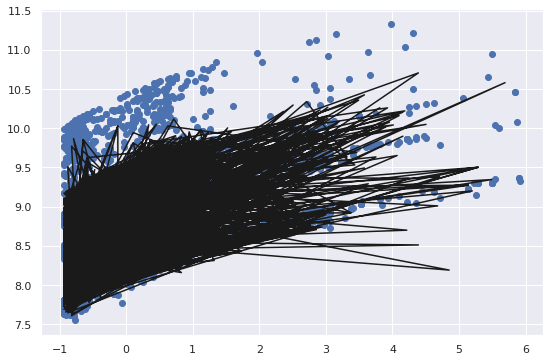

In [167]:
plt.scatter(X_train["Monthly Premium Auto"],y_train)
plt.plot(X_test["Monthly Premium Auto"], svm_y_pred, 'k-')
plt.show()

### Random Forest

In [168]:
rf_reg = RandomForestRegressor(n_estimators=150, random_state=42)
rf_mod = rf_reg.fit(X_train, y_train)

In [169]:
rf_y_pred = rf_mod.predict(X_test)

In [170]:
print("Random Forest MSE:", mean_squared_error(y_test, rf_y_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_y_pred)))
print("Random Forest MAE:", mean_absolute_error(y_test, rf_y_pred))
print("Random Forest R2 Score:", r2_score(y_test, rf_y_pred))

Random Forest MSE: 0.03931090584049368
Random Forest RMSE: 0.1982697804520237
Random Forest MAE: 0.09477626400466882
Random Forest R2 Score: 0.909991511924698


### Gradient Boosting and Hyperparam tuning

In [171]:
gb_reg = GradientBoostingRegressor(n_estimators=150, random_state=42)
gb_mod = gb_reg.fit(X_train, y_train)

In [172]:
gb_y_pred = gb_mod.predict(X_test)

In [173]:
print("Gradient Boosting MSE:", mean_squared_error(y_test, gb_y_pred))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, gb_y_pred)))
print("Gradient Boosting MAE:", mean_absolute_error(y_test, gb_y_pred))
print("Gradient Boosting R2 Score:", r2_score(y_test, gb_y_pred))

Gradient Boosting MSE: 0.04192966224795973
Gradient Boosting RMSE: 0.20476733686786994
Gradient Boosting MAE: 0.11232850370750846
Gradient Boosting R2 Score: 0.9039954581621635


In [174]:
from sklearn.model_selection import GridSearchCV

rf_reg = RandomForestRegressor(random_state=42)
params = {'max_depth' : [10,20,30,40], 'n_estimators' : [100,200,150], 'bootstrap' : [True, False],
          'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes':[None, 2]}

hp_tune = GridSearchCV(estimator=rf_reg, param_grid=params, scoring="neg_mean_squared_error", cv=5, n_jobs=-1, return_train_score=True)
hp_tune.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 2],
                         'n_estimators': [100, 200, 150]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [175]:
hp_tune.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'n_estimators': 200}

In [176]:
hp_tune.best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [177]:
rf_param = RandomForestRegressor(**hp_tune.best_params_)
rf_mod_2 = rf_param.fit(X_train, y_train)

In [178]:
rf_pred2 = rf_mod_2.predict(X_test)

In [179]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb_reg, X_train, y_train,
                       scoring="neg_mean_squared_error", cv=10)
gb_rmse_scores = np.sqrt(-scores)
print("Scores:", gb_rmse_scores)
print("Mean score:", np.mean(gb_rmse_scores))
print("Std score:", np.std(gb_rmse_scores))

Scores: [0.17779507 0.18621858 0.22239946 0.21306099 0.20665135 0.17877881
 0.20381712 0.22141916 0.19398313 0.2151515 ]
Mean score: 0.2019275178996876
Std score: 0.015974540742201535


In [180]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_mod, X_train, y_train,
                       scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
print("Scores:", rf_rmse_scores)
print("Mean score:", np.mean(rf_rmse_scores))
print("Std score:", np.std(rf_rmse_scores))

Scores: [0.16859164 0.18180247 0.22146801 0.19750705 0.19671533 0.17428292
 0.19333208 0.21906105 0.19953455 0.21653105]
Mean score: 0.1968826159618164
Std score: 0.017438402669110325


In [181]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_param, X_train, y_train,
                       scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
print("Scores:", rf_rmse_scores)
print("Mean score:", np.mean(rf_rmse_scores))
print("Std score:", np.std(rf_rmse_scores))

Scores: [0.16405226 0.18165347 0.22333201 0.19734577 0.20083296 0.1747904
 0.19485913 0.21551532 0.20133388 0.2180165 ]
Mean score: 0.19717317126951275
Std score: 0.018248555468940268


In [182]:
scores = cross_val_score(svm_mod1, X_train, y_train,
                       scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)
print("Scores:", svm_rmse_scores)
print("Mean score:", np.mean(svm_rmse_scores))
print("Std score:", np.std(svm_rmse_scores))

Scores: [0.24467117 0.24374639 0.27440818 0.25905082 0.27052575 0.24259013
 0.26322204 0.27093385 0.26274778 0.26310765]
Mean score: 0.2595003777740269
Std score: 0.011252495245463037


### XGB

In [183]:
from xgboost import XGBRegressor

In [184]:
xgb = XGBRegressor(random_state=42)
xgb_mod = xgb.fit(X_train, y_train)

In [185]:
xgb_y_pred = xgb_mod.predict(X_test)

In [186]:
print("XGB MSE:", mean_squared_error(y_test, xgb_y_pred))
print("XGB RMSE:", np.sqrt(mean_squared_error(y_test, xgb_y_pred)))
print("XGB MAE:", mean_absolute_error(y_test, xgb_y_pred))
print("XGB R2 Score:", r2_score(y_test, xgb_y_pred))

XGB MSE: 0.04323388909309642
XGB RMSE: 0.20792760541375072
XGB MAE: 0.11365504032451507
XGB R2 Score: 0.9010092261248175


# Predicting the output for test_df

In [187]:
any(test_df.isnull().sum())

False

In [188]:
test_df_num = test_df.select_dtypes(["float64", "int64"])
test_df_num.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,51643,283,16,43,0,1,1358.400000
1,46402,113,7,2,0,1,476.385575
2,92044,132,7,77,0,3,617.288574
3,16040,96,29,93,0,2,611.476898
4,0,135,12,84,4,2,980.528170


In [189]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       1035 non-null   object 
 1   State                          1035 non-null   object 
 2   Response                       1035 non-null   object 
 3   Coverage                       1035 non-null   object 
 4   Education                      1035 non-null   object 
 5   Effective To Date              1035 non-null   object 
 6   EmploymentStatus               1035 non-null   object 
 7   Gender                         1035 non-null   object 
 8   Income                         1035 non-null   int64  
 9   Location Code                  1035 non-null   object 
 10  Marital Status                 1035 non-null   object 
 11  Monthly Premium Auto           1035 non-null   int64  
 12  Months Since Last Claim        1035 non-null   i

In [190]:
scale_em

['Monthly Premium Auto',
 'Income',
 'Total Claim Amount',
 'Months Since Last Claim',
 'Months Since Policy Inception']

In [191]:
test_df_num[scale_em] = std_scaler.transform(test_df_num[scale_em])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [192]:
test_df_cat = test_df.select_dtypes("object")

In [193]:
test_df_cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,FH77504,California,Yes,Premium,Bachelor,1/24/2011,Employed,F,Suburban,Single,Personal Auto,Personal L3,Offer2,Agent,Luxury Car,Medsize
1,XK87182,Oregon,No,Premium,College,1/25/2011,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
2,HB17438,Washington,No,Extended,Bachelor,2/21/2011,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer4,Web,SUV,Medsize
3,DH18269,Arizona,No,Extended,College,1/13/2011,Medical Leave,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Branch,Two-Door Car,Medsize
4,DP19820,Oregon,No,Extended,College,1/15/2011,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer2,Branch,SUV,Small


In [194]:
for i in test_df_cat:
    test_df_cat[i] = lab_encod.fit_transform(test_df_cat[i])
test_df_cat.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,233,1,1,2,0,16,1,0,1,2,1,5,1,0,1,1
1,934,3,0,2,1,17,1,0,2,1,1,5,0,0,0,1
2,308,4,0,1,0,44,1,1,2,1,1,3,3,3,3,1
3,152,0,0,1,1,4,2,1,1,0,1,5,0,1,5,1
4,168,3,0,1,1,6,4,1,1,2,1,4,1,1,3,2


In [195]:
best_feat

['Income',
 'Total Claim Amount',
 'Monthly Premium Auto',
 'Months Since Policy Inception',
 'Coverage',
 'Vehicle Class',
 'Months Since Last Claim',
 'Number of Policies',
 'Response',
 'EmploymentStatus',
 'Renew Offer Type']

In [196]:
new_test_df = pd.concat([test_df_cat, test_df_num], axis=1)

In [197]:
for i in best_feat:
    if i not in new_test_df:
        print(i)

In [198]:
no_policies = test_df["Number of Policies"]
new_test_df = new_test_df.merge(no_policies)

In [199]:
new_test_df.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,233,1,1,2,0,16,1,0,1,2,1,5,1,0,1,1,0.448286,5.488738,0.098785,-0.197799,0,1,3.207102
1,233,1,1,2,0,16,1,0,1,2,1,5,1,0,1,1,0.448286,5.488738,0.098785,-0.197799,0,1,3.207102
2,233,1,1,2,0,16,1,0,1,2,1,5,1,0,1,1,0.448286,5.488738,0.098785,-0.197799,0,1,3.207102
3,233,1,1,2,0,16,1,0,1,2,1,5,1,0,1,1,0.448286,5.488738,0.098785,-0.197799,0,1,3.207102
4,233,1,1,2,0,16,1,0,1,2,1,5,1,0,1,1,0.448286,5.488738,0.098785,-0.197799,0,1,3.207102


In [200]:
op = rf_param.predict(new_test_df[best_feat])

In [201]:
op.shape, new_test_df.shape

((230579,), (230579, 23))

In [202]:
new_test_df['Customer Lifetime Value'] = np.exp(op)

df_out = pd.merge(test_df,new_test_df[['Customer Lifetime Value']],how = 'left',left_index = True, right_index = True)

In [203]:
df_out

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,FH77504,California,Yes,Premium,Bachelor,1/24/2011,Employed,F,51643,Suburban,Single,283,16,43,0,1,Personal Auto,Personal L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,11014.496627
1,XK87182,Oregon,No,Premium,College,1/25/2011,Employed,F,46402,Urban,Married,113,7,2,0,1,Personal Auto,Personal L3,Offer1,Agent,476.385575,Four-Door Car,Medsize,11014.496627
2,HB17438,Washington,No,Extended,Bachelor,2/21/2011,Employed,M,92044,Urban,Married,132,7,77,0,3,Personal Auto,Personal L1,Offer4,Web,617.288574,SUV,Medsize,11014.496627
3,DH18269,Arizona,No,Extended,College,1/13/2011,Medical Leave,M,16040,Suburban,Divorced,96,29,93,0,2,Personal Auto,Personal L3,Offer1,Branch,611.476898,Two-Door Car,Medsize,11014.496627
4,DP19820,Oregon,No,Extended,College,1/15/2011,Unemployed,M,0,Suburban,Single,135,12,84,4,2,Personal Auto,Personal L2,Offer2,Branch,980.528170,SUV,Small,11014.496627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,LA72316,California,No,Basic,Bachelor,2/10/2011,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,6531.620466
1031,PK87824,California,Yes,Extended,College,2/12/2011,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,6531.620466
1032,TD14365,California,No,Extended,Bachelor,2/6/2011,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6531.620466
1033,UP19263,California,No,Extended,College,2/3/2011,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,6531.620466


In [1]:
pip install -U notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pyppeteer-install

[W:pyppeteer.command] chromium is already installed.
